In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [89]:
df = pd.read_csv("placement.csv")

In [91]:
df.head() 

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [93]:
df.shape 

(100, 4)

In [99]:
#removing unnecessary columns 
df = df.iloc[:, 1:]

In [101]:
df.head() 

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


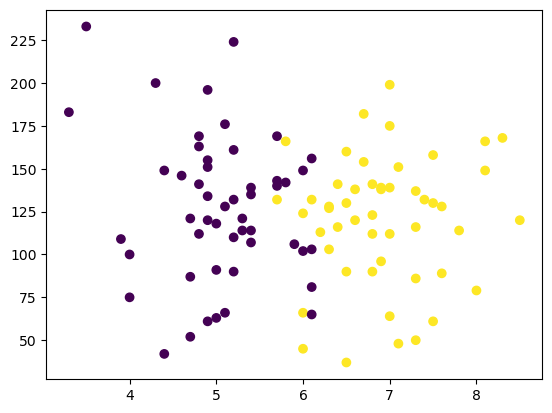

In [103]:
#visual representation of given data 
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [105]:
#independent variable X, output variable y 
X = df.iloc[:, 0:2] 
y = df.iloc[:, -1] 

In [107]:
X 

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [109]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split 

#bc we have limited data, we're splitting it into training and testing data ourselves 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [113]:
X_train 

,cgpa,iq
1,5.9,106.0
20,6.6,120.0
45,6.0,66.0
13,6.4,116.0
50,3.5,233.0
...,...,...
55,7.8,114.0
49,5.4,135.0
82,6.5,37.0
28,5.2,90.0


In [115]:
y_test 

92    0
69    1
38    1
71    1
57    1
58    1
0     1
44    1
53    1
75    0
Name: placement, dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler 

#scaling our data so that it is btwn -1 and 1 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 

In [119]:
X_train 

array([[ 1.01642131e-03, -4.31449753e-01],
       [ 6.41361847e-01, -8.43062736e-02],
       [ 9.24943393e-02, -1.42328827e+00],
       [ 4.58406011e-01, -1.83490125e-01],
       [-2.19445361e+00,  2.71763753e+00],
       [ 2.01353062e+00,  6.34776648e-01],
       [ 9.15795601e-01,  3.86817020e-01],
       [ 1.46466311e+00,  1.63653355e-01],
       [ 1.55614103e+00,  1.14061429e-01],
       [ 1.09875144e+00, -1.86961560e+00],
       [-9.13762759e-01,  7.83552425e-01],
       [ 1.00727352e+00, -2.82673976e-01],
       [-1.00524068e+00,  9.81920128e-01],
       [ 1.55614103e+00, -8.52981121e-01],
       [-1.09671859e+00, -9.02573047e-01],
       [-9.13762759e-01,  6.84368574e-01],
       [-2.37740945e+00,  1.47783938e+00],
       [-7.30806923e-01,  1.30426764e+00],
       [-6.39329005e-01,  9.32328202e-01],
       [ 7.32839765e-01,  7.58756463e-01],
       [-1.37115235e+00,  6.34776648e-01],
       [-1.37115235e+00, -2.01839137e+00],
       [-4.56373169e-01, -2.33082051e-01],
       [ 1.

In [121]:
X_test = scaler.transform(X_test) 

In [123]:
X_test 

array([[-0.639329  , -0.3322659 ],
       [ 2.37944229, -0.08430627],
       [ 0.54988393,  0.90753224],
       [ 0.18397226,  0.21324528],
       [ 0.54988393,  0.16365335],
       [ 1.9220527 , -1.10094075],
       [ 0.82431768, -0.00991839],
       [ 1.46466311, -1.54726808],
       [ 2.19648645,  1.10589994],
       [-1.00524068,  1.13069591]])

In [125]:
#implementation of logistic regression 
from sklearn.linear_model import LogisticRegression  

clf = LogisticRegression() 

In [127]:
#this fits our training data and finds a linear regression function that matches our data 
clf.fit(X_train, y_train) 

LogisticRegression()

In [129]:
#testing if the model works well or not 
y_pred = clf.predict(X_test) 

In [131]:
y_test 

92    0
69    1
38    1
71    1
57    1
58    1
0     1
44    1
53    1
75    0
Name: placement, dtype: int64

In [133]:
y_pred  

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score 

#checking accuracy 
accuracy_score(y_test, y_pred)   


#it used to be 0.9, due to overfitting - turned to 1.0 

1.0

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.5 MB/s eta 0:00:00


<Axes: >

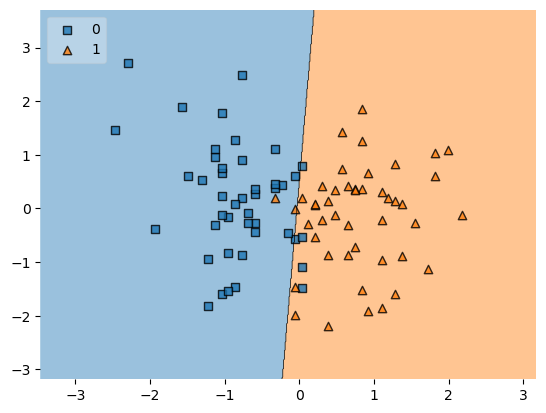

In [71]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions 

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2) 